In [2]:
import numpy as np, matplotlib.pyplot as plt, json

## Experiment 1

- $N = 10$
- $C \in [0; 100[$
- $M \in \{0; 1\}$
- Global planner config:
    - `UAV_THICKNESS = 0.5`
- Local planner config:
    - Collision distance threshold: $0.2$
    - $k_{ep}=5.2$
    - $k_c=0.05$
    - $k_{dir}=2$

The map 1 is not `forest1`. It is the `big_forest` map, but we used it with the configurations of `forest1`. That caused a lot of the configurations to be invalid. But the results are still usable.

**Success rate: 79.94%** (over 1680 valid test cases, after removing the 320 invalid maps)

We need more monitoring over what causes an invalid results.
We also observe an abrupt initial yaw instruction, which causes an unstable behavior and a failure in some cases. We think that we can reduce the number of initial crash by implementing a smoother initial yaw command.

In [3]:
success1 = np.load('save1_success.npy')
failure1 = np.load('save1_failure.npy')
empty1 = np.load('save1_empty.npy')

In [4]:
print('Success', success1)
print('Failure', failure1)

Success [10. 10.  0. 10. 10. 10.  0. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  6.
 10. 10. 10. 10. 10. 10. 10.  0. 10. 10.  3. 10. 10.  9.  0.  2. 10.  0.
  1.  0. 10. 10. 10. 10. 10. 10.  0.  5.  9. 10. 10. 10. 10.  6. 10. 10.
  1.  0.  9. 10. 10. 10.  0.  1.  0.  6. 10.  0. 10.  2. 10. 10. 10. 10.
 10. 10. 10. 10.  1.  1.  0.  0. 10. 10. 10. 10.  9. 10. 10. 10. 10. 10.
 10. 10.  0. 10.  7. 10.  9. 10. 10. 10.  0. 10.  0. 10. 10. 10. 10.  0.
  0. 10. 10.  1. 10.  0. 10.  0. 10.  0. 10. 10. 10.  0. 10.  0.  0.  0.
  0. 10. 10. 10. 10.  0. 10. 10.  0.  0. 10.  0.  0. 10. 10.  0. 10.  0.
 10.  0. 10. 10. 10. 10.  0.  0. 10.  0.  0. 10. 10.  0. 10.  0.  0. 10.
 10.  3.  0. 10.  1. 10. 10.  9.  9. 10.  3.  0.  0. 10.  0.  0.  0. 10.
  0. 10.  0. 10. 10. 10.  0. 10.  0. 10. 10. 10.  0. 10. 10. 10.  0. 10.
 10. 10.]
Failure [ 0.  0. 10.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.
  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  7.  0.  0.  1. 10.  8.  0. 10.
  9. 10.  0.  0.  0.  0. 

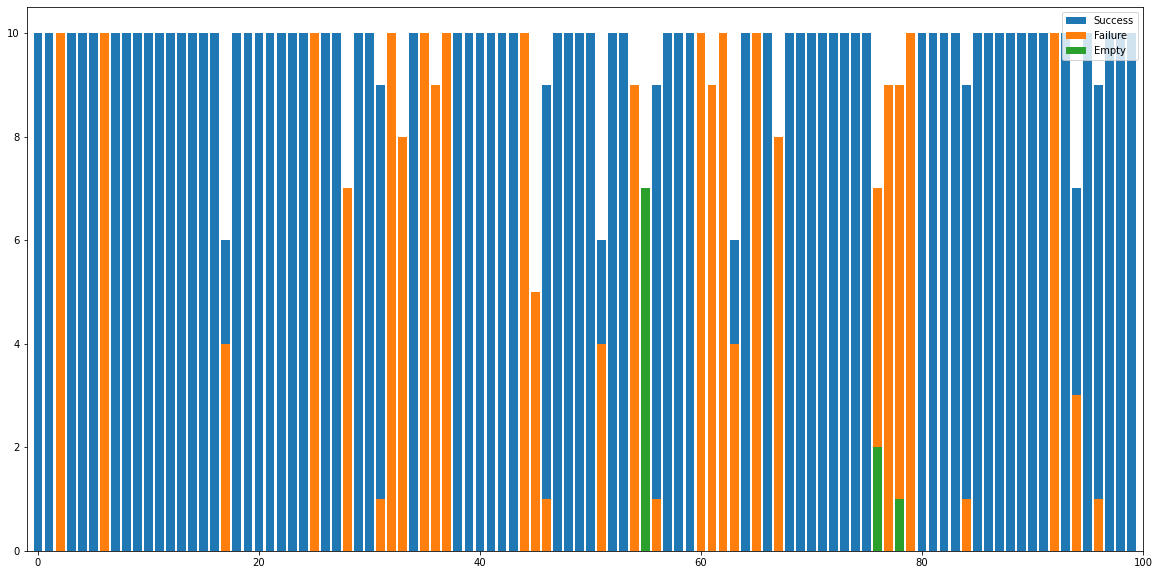

In [5]:
a, b = 0, 100
plt.figure(figsize=(20,10))
plt.bar(np.arange(a, b), success1[a:b], label='Success')
plt.bar(np.arange(a, b), failure1[a:b], label='Failure')
plt.bar(np.arange(a, b), empty1[a:b], label='Empty')
plt.legend()
plt.xlim(a-1, b)
plt.show()

In [6]:
success_rate = np.sum(success1)/(100*2*10 - 320)
print('Success rate: {}%'.format(success_rate*100))

Success rate: 79.94047619047619%


In [7]:
print('Number of fully successful configurations: {}'.format(len(success1[success1 == 10])))
print('Number of fully failed configurations: {}'.format(len(success1[success1 == 0])))

Number of fully successful configurations: 123
Number of fully failed configurations: 53


## Experiment 2

- $N = 10$
- $C \in [0; 100[$
- $M \in \{0; 1\}$
- Global planner config:
    - `UAV_THICKNESS = 0.5`
- Local planner config:
    - Collision distance threshold: $0.2$
    - $k_{ep}=5.2$
    - $k_c=0.05$
    - $k_{dir}=2$
    
The map 1 is not `forest1`. It is the `big_forest` map, but we used it with the configurations of `forest1`. 
That caused a lot of the configurations to be invalid. But the results are still usable.

We implemented a detection system of failure in the global planner, to distinguish global planning failure, invalid maps and unknown failure.
We also added a small algorithm to smooth the initial yaw instructions, before starting the planning algorithm.

**Success rate: 84.70%** (over 1680 valid test cases, after removing the 320 invalid maps)

We obtain better results, thanks to the smoother initial yaw controller.

However the local planner may not be optimal, we observe a lot of unwanted behavior, with sharp turns when the path is close to an obstacle.
The minimization algorithm is not optimal, but the cost function may also not be good enough. Maybe we should reduce the final direction component, and increase the collision cost.

In [8]:
success2, failureLocal2, failureGlobal2, failureMap2, invalid2 = np.load('save2.npy')

In [9]:
print('Number of success: {}'.format(np.sum(success2)))
print('Number of local planner failure: {}'.format(np.sum(failureLocal2)))
print('Number of global planner failure: {}'.format(np.sum(failureGlobal2)))
print('Number of invalid map: {}'.format(np.sum(failureMap2)))
print('Number of unknown failure: {}'.format(np.sum(invalid2)))

print('Number of fully successful configurations: {}'.format(len(success2[success2 == 10])))
print('Number of fully failed configurations: {}'.format(len(success2[success2 == 0])))

print('Success rate: {}%'.format(np.sum(success2)/(100*2*10 - np.sum(failureMap2+failureGlobal2)) * 100))

Number of success: 1423.0
Number of local planner failure: 257.0
Number of global planner failure: 10.0
Number of invalid map: 310.0
Number of unknown failure: 0.0
Number of fully successful configurations: 130
Number of fully failed configurations: 45
Success rate: 84.70238095238095%


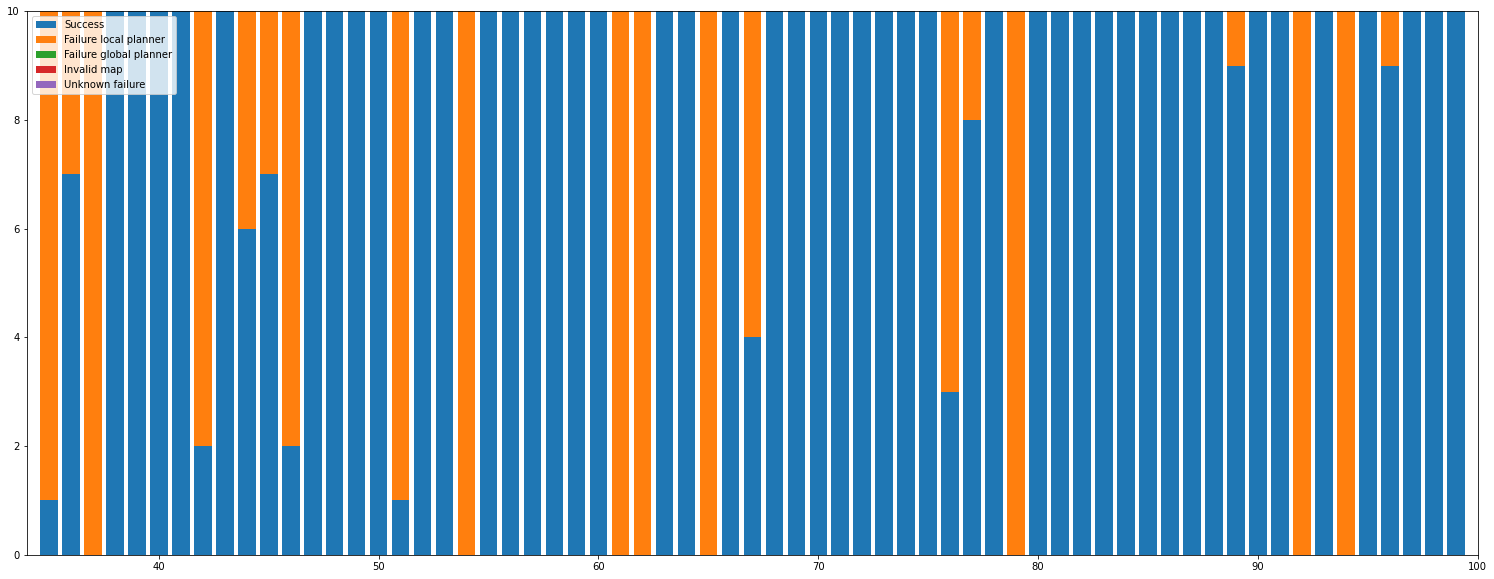

In [16]:
a, b = 35, 100
plt.figure(figsize=(26,10))
plt.bar(np.arange(a, b), success2[a:b], label='Success')
plt.bar(np.arange(a, b), failureLocal2[a:b], label='Failure local planner', bottom=success2[a:b])
plt.bar(np.arange(a, b), failureGlobal2[a:b], label='Failure global planner', bottom=success2[a:b]+failureLocal2[a:b])
plt.bar(np.arange(a, b), failureMap2[a:b], label='Invalid map', bottom=success2[a:b]+failureLocal2[a:b]+failureGlobal2[a:b])
plt.bar(np.arange(a, b), invalid2[a:b], label='Unknown failure', bottom=success2[a:b]+failureLocal2[a:b]+failureGlobal2[a:b]+failureMap2[a:b])
plt.legend()
plt.xlim(a-1, b)
plt.show()

## Experiment 3

- $N = 10$
- $C \in [0; 100[$
- $M \in \{0; 1\}$
- Global planner config:
    - `UAV_THICKNESS = 0.8`
- Local planner config:
    - Collision distance threshold: $0.2$
    - $k_{ep}=5$
    - $k_c=0.1$
    - $k_{dir}=1$
    
The map 1 is not `forest1`. It is the `big_forest` map, but we used it with the configurations of `forest1`. 
That caused a lot of the configurations to be invalid. But the results are still usable.

We slightly improved the tuning of the cost function.

To reduce the number of local planner failures, we tried to make the global planner safer. We increased the threshold distance to consider a point far enough from an obstacle. This had to consequence of making most maps invalid, with the goal or start to close from an obstacle. To improve that, we made a small algorithm to slightly move the goal or start far enough from the obstacles, to be valid. Then we run the algorithm as usual.

Finally, we fixed a small bug with the smooth initial yaw controller, which made negative angles unstable, especially 180° angle.

**Success rate: %** (over 1680 valid test cases, after removing the 320 invalid maps)

